In [1]:
from rmgpy.chemkin import *
from rmgpy.tools.canteraModel import *
from rmgpy.species import Species

%matplotlib inline
import numpy as np
from matplotlib import pyplot

In [2]:
speciesList, reactionList = loadChemkinFile('/home/mjliu/Documents/gcxgc/input_pyro.inp',
                                            '/home/mjliu/Documents/gcxgc/RMG_Dictionary_pyro.txt')

In [3]:
user_hb = Species().fromSMILES('c1ccccc1CCCCCC')
speciesDict = getRMGSpeciesFromUserSpecies([user_hb], speciesList)
hb = speciesDict[user_hb]

reactorTypeList = ['IdealGasReactor']
molFracList=[{hb: 1}]
Tlist = ([723],'K')
Plist = ([35],'atm')
reactionTimeList = ([40], 'min')

In [4]:
speciesList = speciesList[4:]

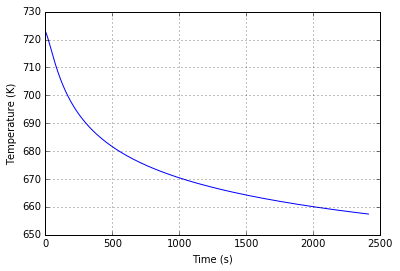

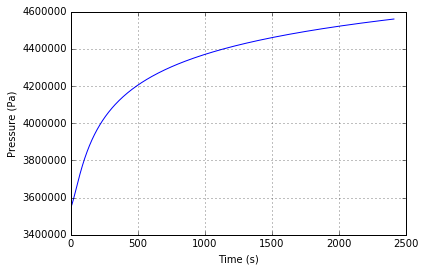

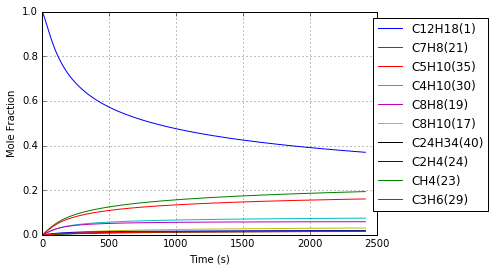

In [5]:
# Create cantera object, loading in the species and reactions
job = Cantera(speciesList=speciesList, reactionList=reactionList, outputDirectory='/home/mjliu/Documents/gcxgc/temp')
# The cantera file must be created from an associated chemkin file

# We can either load the Model from the initialized set of rmg species and reactions
job.loadModel()

# Or load it from a chemkin file by uncommenting the following line:
#job.loadChemkinModel('data/minimal_model/chem_annotated.inp',transportFile='data/minimal_model/tran.dat')

# Generate the conditions based on the settings we declared earlier
job.generateConditions(reactorTypeList, reactionTimeList, molFracList, Tlist, Plist)
# Simulate and plot
alldata = job.simulate()
job.plot(alldata)

In [6]:
species = []
weight = []
dbonds = []
molfrac = []
for entry in alldata[0][1][2:]:
    mol = entry.species.molecule[0]
    species.append(mol)
    weight.append(mol.getMolecularWeight())
    
    bonds = set()
    for atom in mol.atoms:
        bonds.update(atom.bonds.values())
    db = 0
    for bond in bonds:
        if bond.order == 'D':
            db += 1
        elif bond.order == 'B':
            db += 0.5
    dbonds.append(db)
    
    molfrac.append(entry.data[-1])

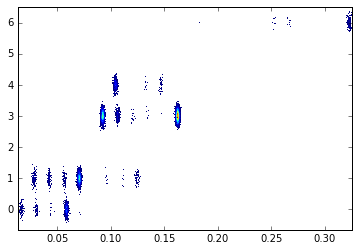

In [8]:
points = np.empty((0, 2))
for i in range(len(species)):
    mean = (weight[i], dbonds[i])
    cov = [[0.000001, 0], [0, 0.02]]
    num = int(round(molfrac[i] * 100000))
    points = np.append(points, np.random.multivariate_normal(mean, cov, num), axis=0)

pyplot.hist2d(points[:, 0], points[:, 1], 1000, cmin=1)
pyplot.show()